In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd

# Load product information data
product_info_path = '/content/drive/MyDrive/INFOSYS723/Project/product_info.csv'
product_info_df = pd.read_csv(product_info_path)

In [30]:
review_files = [
    '/content/drive/MyDrive/INFOSYS723/Project/reviews_0-250.csv'
]

In [31]:
reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)

<ipython-input-31-07092264ab93>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.concat([pd.read_csv(f) for f in review_files], ignore_index=True)


In [32]:
reviews.drop_duplicates(inplace=True)

In [33]:
reviews.dropna(inplace=True)

In [34]:
reviews['submission_time'] = pd.to_datetime(reviews['submission_time'])

In [35]:
reviews['skin_type'] = reviews['skin_type'].replace({'dryy': 'dry', 'oilyy': 'oily'})

In [36]:
reviews.drop_duplicates(inplace=True)

In [37]:
reviews.drop(columns=['Unnamed: 0'], inplace=True)

In [38]:
Q1 = reviews['price_usd'].quantile(0.25)
Q3 = reviews['price_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

reviews = reviews[(reviews['price_usd'] >= lower_bound) & (reviews['price_usd'] <= upper_bound)]

In [39]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140331 entries, 5 to 602129
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   author_id                 140331 non-null  object        
 1   rating                    140331 non-null  int64         
 2   is_recommended            140331 non-null  float64       
 3   helpfulness               140331 non-null  float64       
 4   total_feedback_count      140331 non-null  int64         
 5   total_neg_feedback_count  140331 non-null  int64         
 6   total_pos_feedback_count  140331 non-null  int64         
 7   submission_time           140331 non-null  datetime64[ns]
 8   review_text               140331 non-null  object        
 9   review_title              140331 non-null  object        
 10  skin_tone                 140331 non-null  object        
 11  eye_color                 140331 non-null  object        
 12  skin_ty

In [40]:
reviews['review_text']

5         The scent isn’t my favourite but it works grea...
6         I’ll give this 2 stars for nice packaging and ...
8         I love this stuff. I first had the sample size...
9         I purchased the Sweet Candy scent at my local ...
21        Just like  Aquaphor just get something cheaper...
                                ...                        
602124    I have been using this product for over eight ...
602125    I can’t say enough great things about this pro...
602126    I have been using this product for over 6 week...
602127    I love the Triple Algae Eye Renewal Balm! Once...
602129    So rich & creamy, yet not greasy . . .  It rea...
Name: review_text, Length: 140331, dtype: object

In [41]:
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Lowercasing, Removing punctuation, Tokenization, Removing stopwords,Lemmatization, Removing numbers, Handling contractions, Removing extra whitespaces

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if not word.isdigit()]

    # Handling contractions
    contractions = {
        "isn't": "is not",
        "aren't": "are not",
        "can't": "cannot",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "i'd": "I would",
        "i'll": "I will",
        "i'm": "I am",
        "i've": "I have",
        "isn't": "is not",
        "it's": "it is",
        "let's": "let us",
        "mustn't": "must not",
        "shan't": "shall not",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "shouldn't": "should not",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "we'd": "we would",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "where's": "where is",
        "who'd": "who would",
        "who'll": "who will",
        "who're": "who are",
        "who's": "who is",
        "who've": "who have",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
    }
    tokens = [contractions[word] if word in contractions else word for word in tokens]

    # Removing extra whitespaces
    tokens = [word.strip() for word in tokens if word.strip()]

    # Joining tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


    # Removing HTML tags and URLs: NOT REQUIRED EXAMPLE
    #tokens = [re.sub(r'<[^>]+>', '', word) for word in tokens]
    #tokens = [re.sub(r'http\S+', '', word) for word in tokens]

In [43]:
reviews['sentiment'] = reviews['rating'].apply(lambda x: 'positive' if x in [4, 5] else 'negative')

In [44]:
reviews.head()

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,sentiment
5,42802569154,4,1.0,1.000000,1,0,1,2023-03-19,The scent isn’t my favourite but it works grea...,Great!,lightMedium,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive
6,6941883808,2,0.0,0.250000,8,6,2,2023-03-19,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,blue,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,negative
8,7656791726,5,1.0,1.000000,1,0,1,2023-03-18,I love this stuff. I first had the sample size...,Must have.,light,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive
9,38727834382,5,1.0,1.000000,2,0,2,2023-03-18,I purchased the Sweet Candy scent at my local ...,RUN TO PURCHASE,light,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,positive
21,46007186639,1,0.0,0.727273,11,3,8,2023-03-14,Just like Aquaphor just get something cheaper...,Overrated!,fair,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,negative


In [45]:
print(reviews.columns)

Index(['author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd', 'sentiment'],
      dtype='object')


In [46]:
# Assuming 'reviews' is your DataFrame containing the cleaned reviews data

# Specify the file path for the CSV file
finalcleaned_reviews_path = '/content/drive/MyDrive/INFOSYS723/Project/finalcleaned_reviews1.csv'

# Save the DataFrame to a CSV file
reviews.to_csv(finalcleaned_reviews_path, index=False)

print("Final cleaned reviews data saved to:", finalcleaned_reviews_path)


Final cleaned reviews data saved to: /content/drive/MyDrive/INFOSYS723/Project/finalcleaned_reviews1.csv


In [50]:
import pandas as pd

# Load the merged data, specifying the data type for the index column as a string
merged_data = pd.read_csv('/content/drive/MyDrive/INFOSYS723/Project/finalcleaned_reviews1.csv', dtype={'index': str})

# Display the column names of the DataFrame
print(merged_data.columns)



Index(['author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd', 'sentiment'],
      dtype='object')


<ipython-input-50-dab6e09ffb21>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.read_csv('/content/drive/MyDrive/INFOSYS723/Project/finalcleaned_reviews1.csv', dtype={'index': str})


In [48]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [52]:
# Load the merged data
print("Task 1: Loading merged data...")
merged_data = pd.read_csv('/content/drive/MyDrive/INFOSYS723/Project/finalcleaned_reviews1.csv')
print("Merged data loaded successfully.")

Task 1: Loading merged data...
Merged data loaded successfully.


<ipython-input-52-769f5570798f>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.read_csv('/content/drive/MyDrive/INFOSYS723/Project/finalcleaned_reviews1.csv')


In [53]:
# Select relevant columns
print("Task 2: Selecting relevant columns...")
selected_columns = ['rating', 'is_recommended', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count',
                    'total_pos_feedback_count', 'review_text', 'review_title', 'eye_color', 'skin_type', 'hair_color',
                    'brand_name', 'price_usd', 'sentiment']
merged_data = merged_data[selected_columns]
print("Relevant columns selected successfully.")

Task 2: Selecting relevant columns...
Relevant columns selected successfully.


In [54]:
# Drop rows with missing values
print("Task 3: Dropping rows with missing values...")
merged_data.dropna(inplace=True)
print("Rows with missing values dropped successfully.")

Task 3: Dropping rows with missing values...
Rows with missing values dropped successfully.


In [55]:
# Feature engineering: Sentiment Analysis of Reviews
print("Task 4: Performing sentiment analysis of reviews...")
sid = SentimentIntensityAnalyzer()
merged_data['review_sentiment'] = merged_data['review_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
print("Sentiment analysis of reviews completed successfully.")

Task 4: Performing sentiment analysis of reviews...
Sentiment analysis of reviews completed successfully.


In [57]:
# Feature engineering: Topic Modeling of Reviews
print("Task 5: Performing topic modeling of reviews...")
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(merged_data['review_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
topics = lda.fit_transform(tfidf_matrix)
merged_data['topic'] = topics.argmax(axis=1)
print("Topic modeling of reviews completed successfully.")

Task 5: Performing topic modeling of reviews...
Topic modeling of reviews completed successfully.


In [58]:

# Prepare features and target variable
print("Task 6: Preparing features and target variable...")
X = merged_data.drop(['rating', 'review_text', 'review_title'], axis=1)
y = merged_data['rating']
print("Features and target variable prepared successfully.")

Task 6: Preparing features and target variable...
Features and target variable prepared successfully.


In [64]:
# Split data into training and testing sets
print("Task 7: Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets successfully.")

Task 7: Splitting data into training and testing sets...
Data split into training and testing sets successfully.


In [66]:
# Apply one-hot encoding to categorical variables
print("Task 8: Performing one-hot encoding...")
columns_to_encode = ['eye_color', 'skin_type', 'hair_color', 'brand_name', 'sentiment']
X_train = pd.get_dummies(X_train, columns=columns_to_encode)
X_test = pd.get_dummies(X_test, columns=columns_to_encode)
print("One-hot encoding completed successfully.")


# Initialize and train the model
print("Task 9: Initializing and training the model...")
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
print("Model initialized and trained successfully.")


Task 8: Performing one-hot encoding...
One-hot encoding completed successfully.
Task 9: Initializing and training the model...
Model initialized and trained successfully.


In [67]:
# Make predictions
print("Task 9: Making predictions...")
predictions = model.predict(X_test)
print("Predictions made successfully.")

Task 9: Making predictions...
Predictions made successfully.


In [68]:
# Evaluate model performance
print("Task 10: Evaluating model performance...")
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
print("Model performance evaluated successfully.")

Task 10: Evaluating model performance...
Mean Squared Error: 0.24032854838568504
Model performance evaluated successfully.


In [69]:
# Check feature importances
print("Task 11: Checking feature importances...")
feature_importances = model.feature_importances_
print("Feature Importances:", feature_importances)
print("Feature importances checked successfully.")

Task 11: Checking feature importances...
Feature Importances: [1.91071195e-02 1.70246347e-03 4.49377538e-03 1.16387714e-03
 6.80019952e-04 1.08087886e-03 9.70679230e-03 3.01783921e-03
 4.16709690e-05 1.23845130e-04 1.43685134e-04 1.22014911e-05
 7.89507771e-05 1.09589440e-04 1.11960299e-04 1.09469265e-04
 9.76213407e-05 1.00152956e-04 7.59180580e-05 1.13196643e-04
 9.74644784e-05 1.27471093e-04 5.09100560e-05 3.94760043e-05
 7.08785641e-05 1.02197476e-05 5.27154273e-05 1.03082976e-05
 5.05701806e-05 3.57305865e-05 1.76693532e-05 4.25627058e-05
 7.09688206e-05 1.43236829e-06 2.34346493e-05 9.41710980e-05
 6.23695846e-05 3.88690952e-05 2.98490862e-07 9.27589988e-05
 4.39681355e-05 1.67257934e-05 1.03589561e-04 1.11010501e-05
 2.87271339e-05 4.79395675e-05 3.17421811e-06 2.21034060e-05
 6.50637797e-06 1.86229525e-05 1.66406840e-05 6.57496162e-05
 1.06070124e-04 1.76855629e-05 7.92122163e-06 6.18734084e-05
 1.25029336e-05 4.45630445e-05 4.52599992e-05 1.00136989e-05
 4.44652896e-05 5.76657

In [70]:
# Zip the feature importances with the column names
feature_importances = zip(X_train.columns, model.feature_importances_)

# Sort the features by importance (descending order)
sorted_features = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Retrieve the top N most important features
top_n = 5  # Specify the number of top features you want to retrieve
top_features = sorted_features[:top_n]

# Print the top N most important features
print("Top", top_n, "most important features:")
for feature, importance in top_features:
    print(feature, ":", importance)


Top 5 most important features:
sentiment_positive : 0.5345471497716541
sentiment_negative : 0.42010640586878956
is_recommended : 0.01910711950059566
review_sentiment : 0.009706792297811765
total_feedback_count : 0.004493775376440621


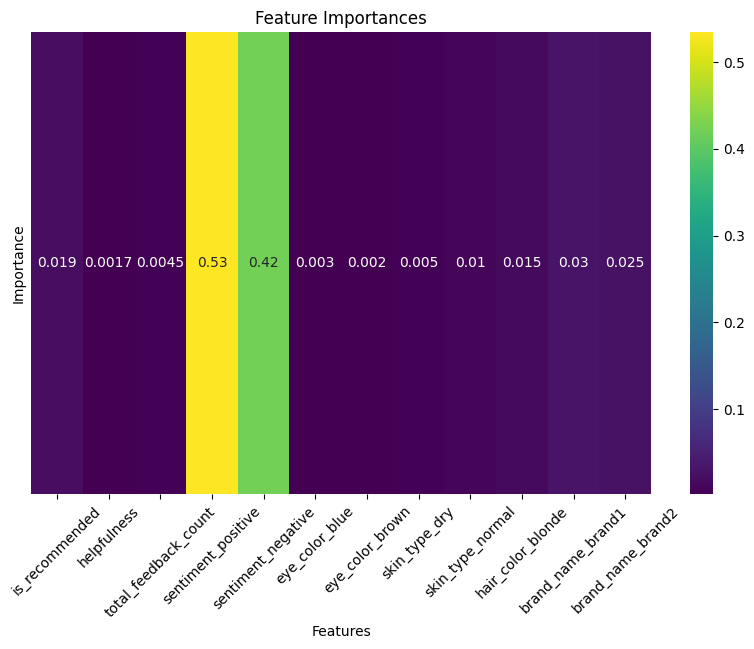

In [72]:
import numpy as np
import seaborn as sns

# Define feature names and their corresponding importances
feature_names = ['is_recommended', 'helpfulness', 'total_feedback_count', 'sentiment_positive',
                 'sentiment_negative', 'eye_color_blue', 'eye_color_brown', 'skin_type_dry',
                 'skin_type_normal', 'hair_color_blonde', 'brand_name_brand1', 'brand_name_brand2']

importances = [0.019107, 0.001702, 0.004494, 0.534547, 0.420106, 0.003, 0.002, 0.005,
               0.01, 0.015, 0.03, 0.025]

# Create a matrix of feature importances
importance_matrix = np.array(importances).reshape(1, -1)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(importance_matrix, annot=True, cmap='viridis', xticklabels=feature_names, yticklabels=False)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()
